In [12]:
import sys, os
sys.path.append('../..')
from tools import ML
from tools.instruments import instruments
from tools.display import ohlc_chart, highchart
import h5py
import matplotlib.pyplot as plt
import numpy as np


In [13]:
%load_ext autoreload
%aimport tools.ML
%aimport tools.display
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
fig, (ax) = plt.subplots(2+cnt,1, figsize=(xsize, ysize), sharex=True, gridspec_kw = {'height_ratios':[4,1]+[1]*cnt})

### 0. Parameters

In [10]:
window = 50
filepath = os.path.join('..','..','data','trend index','training set', 'trend_50day.hdf')

### 1. Gathering Data

In [12]:
file = h5py.File(filepath, mode='a')

In [21]:
quotes = instruments.quotes(fields='ohlc').copy()
symbols = list(quotes.columns.levels[0])

In [22]:
df = quotes['AD'].iloc[-50:]

In [163]:
quote = quotes['AD']

In [171]:
highchart([{'data':quote,'type':'candlestick'}])

<AxesSubplot:>

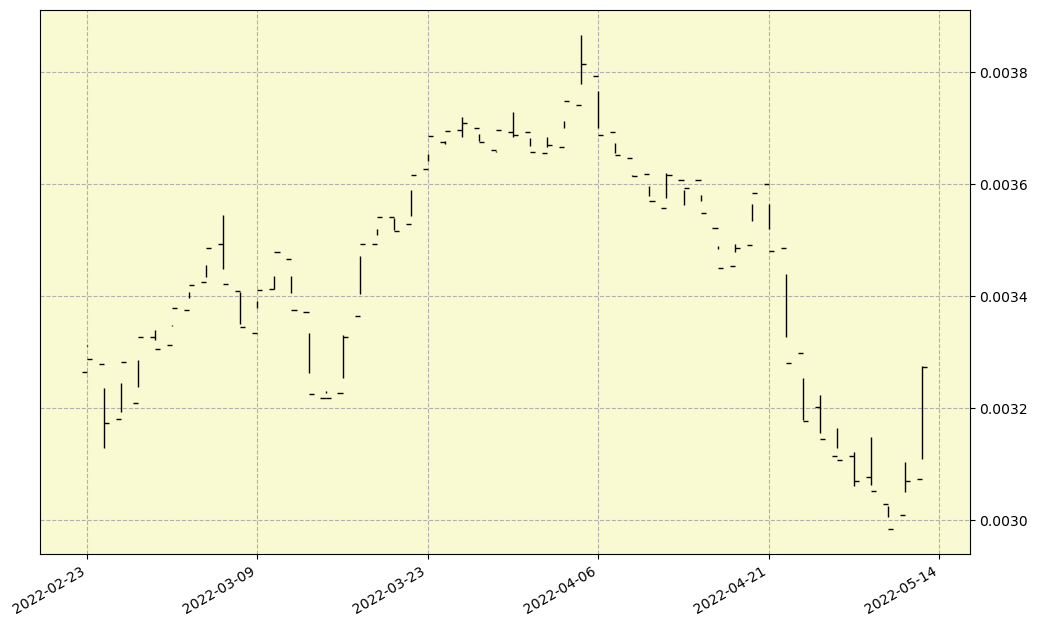

In [65]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
fig.autofmt_xdate()
ohlc_chart(ax, q.iloc[-50:])

In [158]:
a=s[0]

In [160]:
a.filename.count('..')

2

In [161]:
highchart([{'data':df, 'type':'ohlc'}])

In [132]:
IFrame('../../temp/20230703185001.html', width=1000, height=800)

In [125]:
highchart([{'data':df-df.mean(), 'type':'ohlc'}])

In [14]:
from IPython.display import IFrame
#HTML(filename='chart.html')

In [112]:
display(HTML(data=str(soup)))

In [114]:
bytes(str(soup), 'utf-8')

b'<html>\n<head>\n<script id="highchart" src="https://code.highcharts.com/stock/highstock.js"></script>\n<script src="https://code.highcharts.com/modules/accessibility.js"></script>\n</head>\n<body>\n<div align="center">\n<figure class="highcharts-figure" style="width:1000px;">\n<div id="chart"></div>\n</figure>\n</div>\n<script>var data=[{\'name\': \'\', \'chartdata\': [[1645574400000.0, 0.7229499816894531, 0.7294999957084656, 0.7228999733924866, 0.7245999574661255], [1645660800000.0, 0.7239499688148499, 0.7243499755859375, 0.7105500102043152, 0.7168999910354614], [1645747200000.0, 0.7173500061035156, 0.7248499989509583, 0.7149499654769897, 0.7242499589920044], [1646006400000.0, 0.7192999720573425, 0.7276999950408936, 0.7178999781608582, 0.7273499965667725], [1646092800000.0, 0.7271999716758728, 0.7300499677658081, 0.7248499989509583, 0.725849986076355], [1646179200000.0, 0.7261999845504761, 0.7317500114440918, 0.7253499627113342, 0.7307499647140503], [1646265600000.0, 0.7304999828338

In [123]:
display(IFrame('<p>sdf</p>', width = 900, height=500))

In [110]:
IFrame?

In [52]:
with open("chart.html", 'r', encoding='utf8') as f:
    chart = f.read()

In [53]:
d = re.sub('{data}',str(data), chart)

In [102]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(open('chart.html', encoding='utf8'), 'html.parser')

In [103]:
p_tag = soup.new_tag("script")
#p_tag.string = 'This is the new paragraph'
#soup.body.append(p_tag)

In [104]:
p_tag.string = f"var data={data}; const chartHeight = {300}"

In [105]:
soup.body.append(p_tag)

In [106]:
with open("index.html", "w") as file:
    file.write(str(soup))

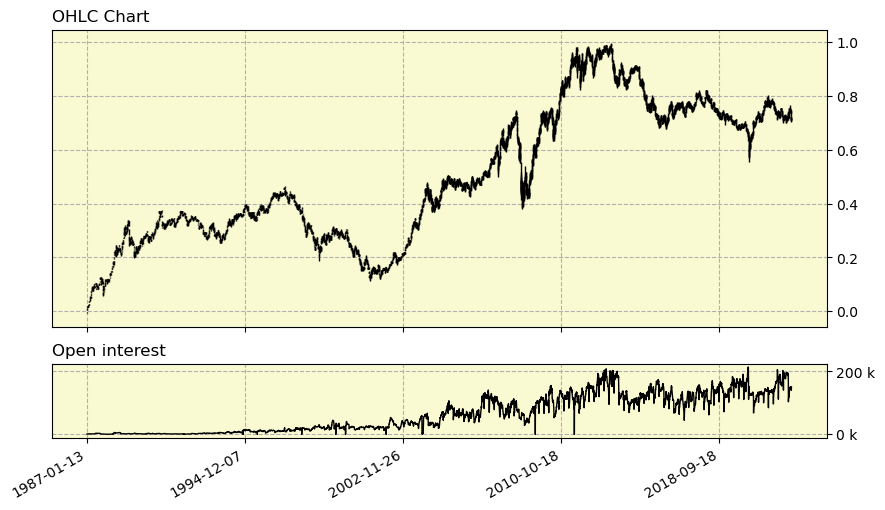

In [27]:
view(instruments['AD'].quotes())

In [13]:
num_dim = 4 #open, high, low, close
if 'X' not in file.keys():
        file.create_dataset('X', (0, window, num_dim), maxshape=(None, window, num_dim), dtype='float32', compression='gzip')
        file.create_dataset('Y', (0,), maxshape=(None,), dtype='i')
X, Y  = file['X'], file['Y']


quotes = instruments.quotes()

while True:
    

In [ ]:

    file = open_file('h5py', filepath, mode='a')
    num_dim = 4 #open, high, low, close

    if 'X' not in file.keys():
        file.create_dataset('X', (0, window, num_dim), maxshape=(None, window, num_dim), dtype='float32', compression='gzip')
        file.create_dataset('Y', (0,), maxshape=(None,), dtype='i')
    
    X, Y  = file['X'], file['Y']
    names = [name for name in raw_file]
    

    while True:
        name = np.random.choice(names)
        raw_data = dataframe(name, raw_file).reset_index(drop=True)

        length = len(raw_data)

        for i in range(10):
            print(name)
            #시작일자 랜덤 설정
            start = np.random.choice(raw_data.index[:-window])
            end = start + window 
            data= raw_data.iloc[start:end]

            #Data Normalization
            base = np.abs(data.close.diff()).mean()
            data = norm(data)

            #그래프 
            fig, (ax) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[1, 1]}, figsize=(12,14))
            fig.autofmt_xdate()

            s= start - 240
            ohlc_chart(ax[0], raw_data.iloc[s:end], colors=['k','k'], linewidth=1.44)
            ax[0].axvspan(start, end, facecolor='C1', alpha=0.2)

            candle_chart(ax[1], raw_data.iloc[start:end], colors=['red','blue'], linewidth=1.44)
            mean = raw_data[start:end].close.mean()
            ax[1].axhline(y=mean, linewidth=1.2, color='g')
            ymin = raw_data.open.loc[start]-base*2
            ymax = raw_data.open.loc[start]+base*2
            ax[1].axhspan(ymin, ymax, alpha=0.2, color='C1')
            ax[1].axhline(y=raw_data.open.loc[start], linewidth=1.2, color='red')
            
            ax[1].axvline(x= (start + end -1)/2, linewidth=1, color='g')
            plt.show()

            #추세 입력

            time.sleep(0.1)
            print('range: ',data.close.max() - data.close.min())
            trend = input("하락(0), 기타(1), 상승(2): ")
            if trend == 'q' or trend == 'n':
                break
            elif trend in ['0','1','2']:
                size = X.shape[0]
                X.resize(size+1, axis=0)
                Y.resize(size+1, axis=0)
                X[size] = data[['open','high','low','close']].values
                Y[size] = int(trend)

            clear_output(wait=True)
        if trend == 'q':
                #file.close()
                break
        clear_output(wait=True)
    file.close()

In [ ]:
ML.gathering_trend(filepath, raw_file, window)

CME_LC


### 2. Verification

In [7]:
from collections import Counter

In [8]:
file = open_file('h5py', filepath, mode='r')

In [9]:
print(file['X'].shape)
print(file['Y'].shape)

(791, 10, 4)
(791,)


In [10]:
Y = file['Y']
Counter(Y)

Counter({0: 187, 1: 396, 2: 208})

In [11]:
file.close()